In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
sns.set()

In [23]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [28]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
#scale the data\
scaler =StandardScaler()
X_scaled=scaler.fit_transform(X)

In [29]:
#apply DBSCAN
dbscan =DBSCAN(eps=0.25,min_samples=5)
labels=dbscan.fit_predict(X_scaled)

In [30]:
df["Cluster"]=labels
print('unique cluster labels',set(labels))
print(df.head())

unique cluster labels {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)}
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0       -1  
1        0  
2       -1  
3        0  
4       -1  


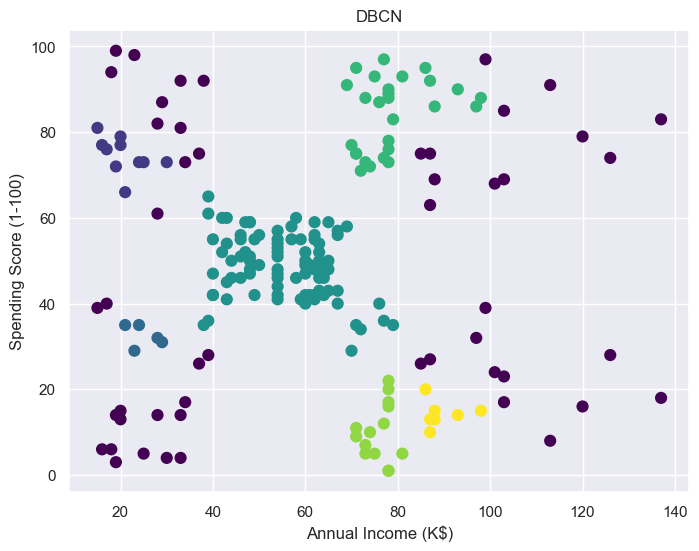

Values Cluster Count
Cluster
 2    87
-1    50
 3    27
 4    14
 0    10
 5     7
 1     5
Name: count, dtype: int64


In [40]:
#visualize
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c =df['Cluster'],cmap="viridis",s=60)
plt.title('DBCN')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
print('Values Cluster Count')
print(df['Cluster'].value_counts())